# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Feature Selection

### Feature Selection using domain knowledge and business understanding

Features that provide valuable information about customer behavior, flight activity, and revenue generation:

1. `FFP_TIER` (Tier of Frequent Flyer Program)
- Indicates the customer's loyalty level. 
- High-tier members are usually more engaged and profitable.
2. `FLIGHT_COUNT` (Number of Customer Flights)
- Represents the customer's flight frequency and helps identify highly active travelers.
3. `SEG_KM_SUM` (Total distance of flights)
- Captures the customer's travel volume and gives insights into long-haul vs. short-haul customers.
4. `SUM_YR_1` (Fare Revenue)
- Indicates the monetary value of the customer to the airline in a specific period.
5. `LAST_TO_END` (Distance from the last flight to the end of data collection)
- Reflects customer recency, an important metric in understanding customer engagement.
6. `avg_discount` (Average discount received by customers)
- Identifies price-sensitive customers and can differentiate between deal-seekers and premium-paying travelers.

In [2]:
# FFP_TIER' is categorical
selected_features = ['FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'LAST_TO_END', 'avg_discount']

flight_df = pd.read_csv('flight.csv')

flight_df[selected_features]

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount
0,210,580717,239560.0,1,0.961639
1,140,293678,171483.0,7,1.252314
2,135,283712,163618.0,11,1.254676
3,23,281336,116350.0,97,1.090870
4,152,309928,124560.0,5,0.970658
...,...,...,...,...,...
62983,2,1134,0.0,297,0.000000
62984,4,8016,0.0,89,0.000000
62985,2,2594,0.0,29,0.000000
62986,2,3934,0.0,400,0.000000


In [3]:
flight_df.groupby('FFP_TIER').size()

FFP_TIER
4    58066
5     3409
6     1513
dtype: int64

In [4]:
def visualize_num_kde(df, numerical_features):
    num_features = len(numerical_features)
    num_rows = (num_features + 2) // 3 
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
    #fig.suptitle("KDE Plots for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
    axes = axes.flatten()
    for i, col in enumerate(numerical_features):
        sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
        axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.show()


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

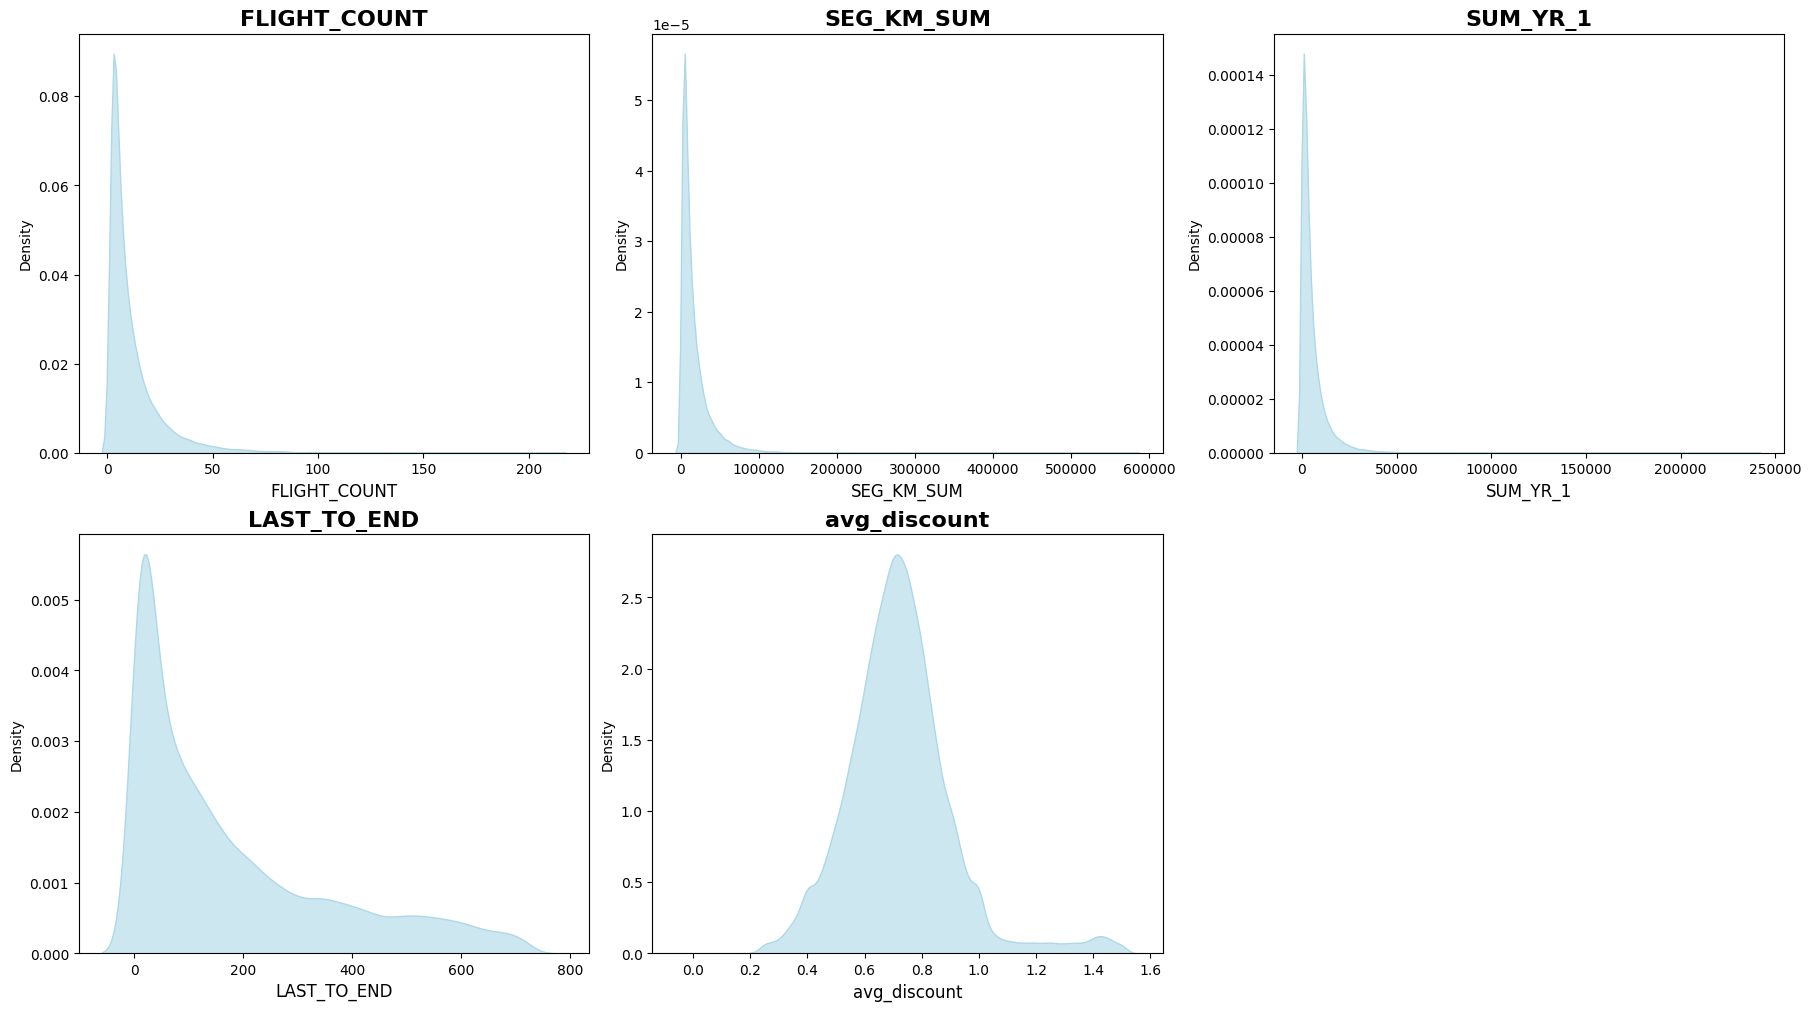

In [5]:
visualize_num_kde(flight_df, selected_features)

### Remove redundant features

- Remove single-valued features
- Remove high cardinality features
- Remove features with high correlation

## Preprocessing

In [6]:
selected_flight_df = flight_df[selected_features + ['FFP_TIER']]

### Handle Missing values

In [7]:
def summarize_dataframe(df):
    summary = pd.DataFrame({
        'Pandas_Dtype': df.dtypes,
        'Python_Type': df.dtypes.apply(lambda x: str(x.type)),
        'Missing_Values': df.isnull().sum(),
        '%_Missing_Values': (df.isnull().mean() * 100).round(2)
    })
    summary.reset_index(inplace=True)
    summary.rename(columns={'index': 'Feature'}, inplace=True)
    return summary


In [8]:
summary_table = summarize_dataframe(selected_flight_df)

summary_table

,Feature,Pandas_Dtype,Python_Type,Missing_Values,%_Missing_Values
0,FLIGHT_COUNT,int64,<class 'numpy.int64'>,0,0.00
1,SEG_KM_SUM,int64,<class 'numpy.int64'>,0,0.00
2,SUM_YR_1,float64,<class 'numpy.float64'>,551,0.87
3,LAST_TO_END,int64,<class 'numpy.int64'>,0,0.00
4,avg_discount,float64,<class 'numpy.float64'>,0,0.00
5,FFP_TIER,int64,<class 'numpy.int64'>,0,0.00


In [9]:
selected_flight_df['SUM_YR_1'].fillna(selected_flight_df['SUM_YR_1'].median(), inplace=True)

C:\Users\fizuf\AppData\Local\Temp\ipykernel_11968\2217503051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_flight_df['SUM_YR_1'].fillna(selected_flight_df['SUM_YR_1'].median(), inplace=True)
C:\Users\fizuf\AppData\Local\Temp\ipykernel_11968\2217503051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_flight_df['SUM_YR

In [10]:
summary_table = summarize_dataframe(selected_flight_df)

In [11]:
summary_table

,Feature,Pandas_Dtype,Python_Type,Missing_Values,%_Missing_Values
0,FLIGHT_COUNT,int64,<class 'numpy.int64'>,0,0.0
1,SEG_KM_SUM,int64,<class 'numpy.int64'>,0,0.0
2,SUM_YR_1,float64,<class 'numpy.float64'>,0,0.0
3,LAST_TO_END,int64,<class 'numpy.int64'>,0,0.0
4,avg_discount,float64,<class 'numpy.float64'>,0,0.0
5,FFP_TIER,int64,<class 'numpy.int64'>,0,0.0


### Remove duplicates (if any)

In [12]:
duplicate_rows = selected_flight_df.duplicated(keep='first')

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 142


In [13]:
selected_flight_df[duplicate_rows == True]

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER
7742,4,30398,18000.0,130,0.860,4
8107,3,36696,5700.0,130,0.690,4
8165,2,24464,12600.0,603,1.030,4
9163,10,35350,5584.0,132,0.660,4
12659,2,24464,6400.0,653,0.750,4
...,...,...,...,...,...,...
62187,2,1298,875.0,389,0.625,4
62317,2,1902,740.0,560,0.400,4
62339,2,1312,840.0,649,0.575,4
62552,2,2710,2800.0,659,0.250,4


In [14]:
# Remove duplicates and keep only the first occurrence
selected_flight_df = selected_flight_df.drop_duplicates(keep='first')

num_duplicates = selected_flight_df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates}")

Number of duplicate rows after removal: 0


In [15]:
selected_flight_df

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER
0,210,580717,239560.0,1,0.961639,6
1,140,293678,171483.0,7,1.252314,6
2,135,283712,163618.0,11,1.254676,6
3,23,281336,116350.0,97,1.090870,5
4,152,309928,124560.0,5,0.970658,6
...,...,...,...,...,...,...
62983,2,1134,0.0,297,0.000000,4
62984,4,8016,0.0,89,0.000000,4
62985,2,2594,0.0,29,0.000000,4
62986,2,3934,0.0,400,0.000000,4


### Outliers Handling

Using IQR methods

Utility functions:

In [16]:
from scipy.stats import skew

def skew_category(value):
    if value > 0.6:
        return "Right Skewed"
    elif value < -0.6:
        return "Left Skewed"
    else:
        return "Symmetric"


def detect_outliers(dataframe, num_features):
    #num_features = continuous_num_features + ordinal_num_features

    Q1 = dataframe[num_features].quantile(0.25)
    Q3 = dataframe[num_features].quantile(0.75)
    IQR = Q3 - Q1

    outliers_IQR = ((dataframe[num_features] < (Q1 - 1.5 * IQR)) | (dataframe[num_features] > (Q3 + 1.5 * IQR)))

    outliers_count_IQR = outliers_IQR.sum()

    outliers_percentage = (outliers_count_IQR / dataframe.shape[0]) * 100

    skewness = dataframe[num_features].apply(lambda x: skew(x.dropna()))

    # Prepare summary statistics DataFrame
    num_desc_stats = pd.DataFrame({
        # 'min': df[num_features].min(),
        # 'max': df[num_features].max(),
        # 'mean': df[num_features].mean(),
        # 'median': df[num_features].median(),
        # 'std': df[num_features].std(),
        'skewness': skewness,
        'outlier_count': outliers_count_IQR,
        'outliers (%)': outliers_percentage,
        'skew': skewness.apply(skew_category)
    })

    num_desc_stats = num_desc_stats.sort_values(by='outlier_count', ascending=False).reset_index()
    return num_desc_stats


In [17]:
outliers_stats = detect_outliers(selected_flight_df, selected_features)
outliers_stats

,index,skewness,outlier_count,outliers (%),skew
0,SUM_YR_1,5.107046,5015,7.979824,Right Skewed
1,SEG_KM_SUM,3.882119,4775,7.597938,Right Skewed
2,FLIGHT_COUNT,3.212781,4304,6.848487,Right Skewed
3,avg_discount,0.957893,2573,4.094135,Right Skewed
4,LAST_TO_END,1.183424,1928,3.067817,Right Skewed


### Transformation

Log transformation

In [18]:
selected_flight_df[selected_features] = np.log1p(selected_flight_df[selected_features]) 

In [19]:
outliers_stats = detect_outliers(selected_flight_df, selected_features)

outliers_stats

,index,skewness,outlier_count,outliers (%),skew
0,SUM_YR_1,-1.509413,9917,15.779843,Left Skewed
1,avg_discount,0.384109,2840,4.518983,Symmetric
2,SEG_KM_SUM,0.104668,71,0.112975,Symmetric
3,FLIGHT_COUNT,0.547459,35,0.055692,Symmetric
4,LAST_TO_END,-0.595847,0,0.000000,Symmetric


In [20]:
selected_flight_df['SUM_YR_1'] = np.cbrt(selected_flight_df['SUM_YR_1'])

In [21]:
outliers_stats = detect_outliers(selected_flight_df, selected_features)

outliers_stats

,index,skewness,outlier_count,outliers (%),skew
0,SUM_YR_1,-1.834046,9899,15.751201,Left Skewed
1,avg_discount,0.384109,2840,4.518983,Symmetric
2,SEG_KM_SUM,0.104668,71,0.112975,Symmetric
3,FLIGHT_COUNT,0.547459,35,0.055692,Symmetric
4,LAST_TO_END,-0.595847,0,0.000000,Symmetric


Winsorizing to remove outliers

In [22]:
from scipy.stats.mstats import winsorize

selected_flight_df['SUM_YR_1'] = winsorize(selected_flight_df['SUM_YR_1'], limits=(0.1, 0.01))  # 10% lower, 1% upper

In [23]:
outliers_stats = detect_outliers(selected_flight_df, selected_features)

outliers_stats

,index,skewness,outlier_count,outliers (%),skew
0,SUM_YR_1,-1.834758,9898,15.749610,Left Skewed
1,avg_discount,0.384109,2840,4.518983,Symmetric
2,SEG_KM_SUM,0.104668,71,0.112975,Symmetric
3,FLIGHT_COUNT,0.547459,35,0.055692,Symmetric
4,LAST_TO_END,-0.595847,0,0.000000,Symmetric


c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

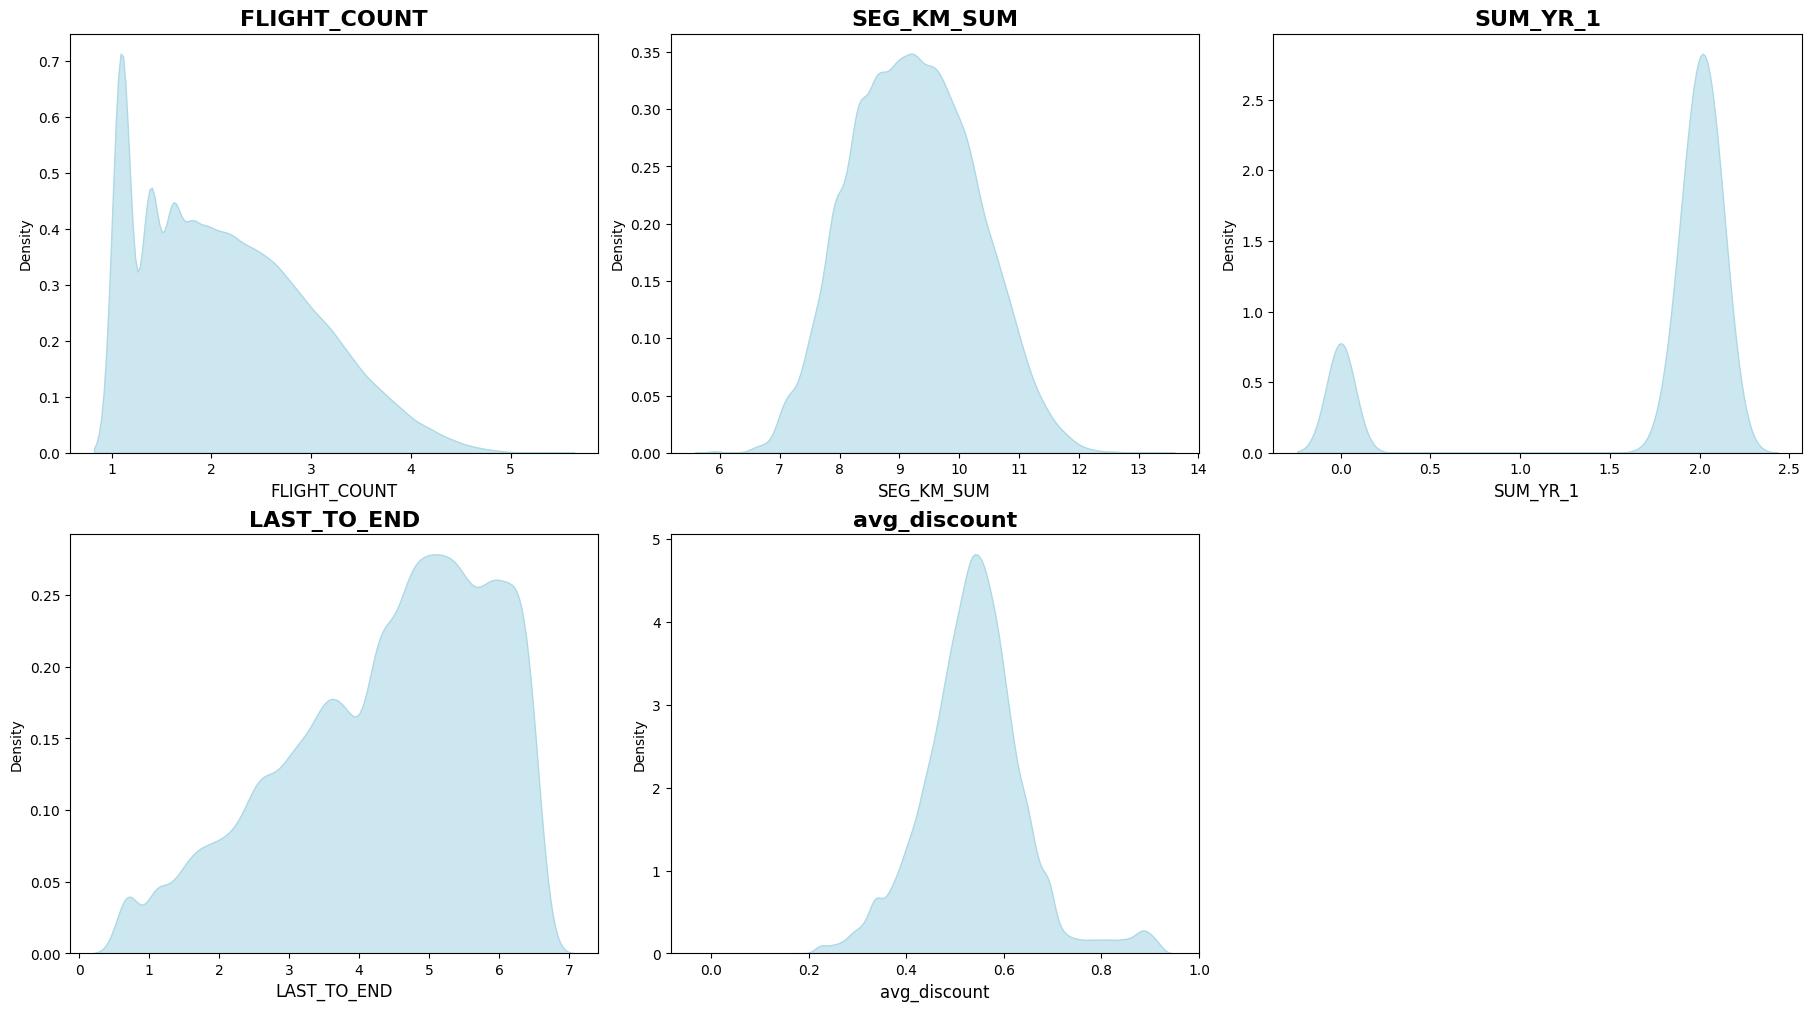

In [24]:
visualize_num_kde(selected_flight_df, selected_features)

### Feature Encoding

In [25]:
selected_flight_df

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER
0,5.351858,13.272021,2.192695,0.693147,0.673780,6
1,4.948760,12.590243,2.192695,2.079442,0.811958,6
2,4.912655,12.555718,2.192695,2.484907,0.813006,6
3,3.178054,12.547309,2.192695,4.584967,0.737580,5
4,5.030438,12.644099,2.192695,1.791759,0.678367,6
...,...,...,...,...,...,...
62983,1.098612,7.034388,0.000000,5.697093,0.000000,4
62984,1.609438,8.989320,0.000000,4.499810,0.000000,4
62985,1.098612,7.861342,0.000000,3.401197,0.000000,4
62986,1.098612,8.277666,0.000000,5.993961,0.000000,4


One-Hot Encoding for FFP_TIER

In [26]:
selected_flight_df['FFP_TIER_4'] = (selected_flight_df['FFP_TIER'] == 4).astype(int)
selected_flight_df['FFP_TIER_5'] = (selected_flight_df['FFP_TIER'] == 5).astype(int)
selected_flight_df['FFP_TIER_6'] = (selected_flight_df['FFP_TIER'] == 6).astype(int)

# Drop the original FFP_TIER column if needed
selected_flight_df = selected_flight_df.drop(columns=['FFP_TIER'])

### Normalization

Min-Max scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

selected_flight_df[selected_features] = scaler.fit_transform(selected_flight_df[selected_features])

In [28]:
selected_flight_df.head(20)

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER_4,FFP_TIER_5,FFP_TIER_6
0,0.996692,1.000000,1.0,0.000000,0.735335,0,0,1
1,0.902231,0.907383,1.0,0.234860,0.886136,0,0,1
2,0.893770,0.902693,1.0,0.303553,0.887280,0,0,1
3,0.487290,0.901550,1.0,0.659336,0.804963,0,1,0
4,0.921371,0.914699,1.0,0.186122,0.740341,0,0,1
5,0.804709,0.907801,1.0,0.624955,0.738697,0,0,1
6,0.826356,0.904278,1.0,0.000000,0.737395,0,0,1
7,0.751155,0.904367,1.0,0.117430,0.735575,0,0,1
8,0.689990,0.919674,1.0,0.212238,0.658616,0,1,0
9,0.720767,0.940616,1.0,0.352290,0.584235,0,0,1


In [29]:
selected_flight_df.tail(20)

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER_4,FFP_TIER_5,FFP_TIER_6
62968,0.000000,0.148010,0.822256,0.923129,0.243529,1,0,0
62969,0.000000,0.148010,0.822256,0.942068,0.243529,1,0,0
62970,0.000000,0.148010,0.822256,0.948148,0.243529,1,0,0
62971,0.000000,0.148010,0.000000,0.880239,0.243529,1,0,0
62972,0.000000,0.223696,0.000000,0.763278,0.142999,1,0,0
62973,0.000000,0.098331,0.000000,0.878826,0.327521,1,0,0
62974,0.000000,0.000000,0.000000,0.644909,0.585506,1,0,0
62975,0.000000,0.000000,0.000000,0.696447,0.559673,1,0,0
62976,0.000000,0.143733,0.812397,0.507525,0.221481,1,0,0
62977,0.000000,0.121874,0.819503,0.923129,0.243529,1,0,0


### Feature Engineering

In [30]:
selected_flight_df['TOTAL_DISTANCE'] = selected_flight_df['SEG_KM_SUM'] * selected_flight_df['FLIGHT_COUNT']

In [31]:
selected_flight_df.head(5)

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER_4,FFP_TIER_5,FFP_TIER_6,TOTAL_DISTANCE
0,0.996692,1.000000,1.0,0.000000,0.735335,0,0,1,0.996692
1,0.902231,0.907383,1.0,0.234860,0.886136,0,0,1,0.818669
2,0.893770,0.902693,1.0,0.303553,0.887280,0,0,1,0.806800
3,0.487290,0.901550,1.0,0.659336,0.804963,0,1,0,0.439316
4,0.921371,0.914699,1.0,0.186122,0.740341,0,0,1,0.842777


In [32]:
selected_flight_df.to_csv('preprocessed_flights.csv', index=False)